In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")

In [5]:
from SSMuLA.landscape_global import LIB_TYPES

In [54]:
active_lib_list = [
    "DHFR",
    "GB1",
    "ParD2",
    "ParD3",
    "TrpB3D",
    "TrpB3E",
    "TrpB3F",
    "TrpB3G",
    "TrpB3I",
    "TrpB4",
]

In [7]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [9]:
from SSMuLA.zs_analysis import ZS_OPTS
from SSMuLA.zs_data import MSA_DICT
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

%matplotlib inline

In [ ]:
from matplotlib.lines import Line2D

In [11]:
mlde_all.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [ ]:
# zs_df["type"] = zs_df["lib"].map(
#     {n: v["type"] for n, v in LIB_INFO_DICT.items()}
# )
# binding = slice_zs[slice_zs["type"] == "Binding"]
# ea = slice_zs[slice_zs["type"] == "Enzymatic activity"]

 # add error bar for rand
"""ax[0, i].errorbar(
    rand_x, rand_y, yerr=pair_taskwy(df=arch_df, val_col="last_value_std")[1], fmt="", ecolor="#666666", capsize=2
)"""

In [24]:
def get_val_frac(s: pd.Series, numb: float = 1) -> float:
    """
    Get the fraction of a column that is equal to a certain number.
    """
    return (s == numb).sum() / len(s)

In [38]:
n_sample = 384
lib_dict_plot_df = pd.DataFrame(columns=["lib", "zs", "top_maxes_mean", "top_maxes_std", "frac"])
for lib in active_lib_list:

    for zs in ["none"] + ZS_OPTS:
        if zs == "ed_score":
            slice_df = mlde_all[(mlde_all["lib"] == lib)&(mlde_all["n_sample"] == n_sample)&(mlde_all["zs"] == "none")&(mlde_all["n_mut_cutoff"] == "double")]
        else:
            slice_df = mlde_all[(mlde_all["lib"] == lib)&(mlde_all["n_sample"] == n_sample)&(mlde_all["zs"] == zs)&(mlde_all["n_mut_cutoff"] == "all")]

        lib_dict_plot_df = lib_dict_plot_df._append(
            {
                "lib": lib,
                "zs": zs,
                "top_maxes_mean": slice_df["top_maxes"].mean(),
                "top_maxes_std": slice_df["top_maxes"].std(),
                "frac": get_val_frac(slice_df["if_truemaxs"]),
            },
            ignore_index=True,
        )
    

In [60]:
MSA_DICT

{'DHFR': 16042,
 'ParD2': 6789,
 'ParD3': 6784,
 'GB1': 29,
 'TrpB3A': 5816,
 'TrpB3B': 5816,
 'TrpB3C': 5816,
 'TrpB3D': 5816,
 'TrpB3E': 5816,
 'TrpB3F': 5816,
 'TrpB3G': 5816,
 'TrpB3H': 5816,
 'TrpB3I': 5816,
 'TrpB4': 5816}

In [47]:
from SSMuLA.landscape_global import LIB_INFO_DICT

In [64]:
lib_dict_plot_df["type"] = lib_dict_plot_df["lib"].map({n: v["type"] for n, v in LIB_INFO_DICT.items()})
lib_dict_plot_df["msa"] = lib_dict_plot_df["lib"].map(MSA_DICT)
lib_dict_plot_df = lib_dict_plot_df.sort_values("lib")
binding = lib_dict_plot_df[lib_dict_plot_df["type"] == "Binding"]
ea = lib_dict_plot_df[lib_dict_plot_df["type"] == "Enzymatic activity"]

In [65]:
binding

,lib,zs,top_maxes_mean,top_maxes_std,frac,type,msa
20,GB1,Triad_score,0.839463,0.134858,0.280833,Binding,29
21,GB1,ev_score,0.808162,0.130827,0.176667,Binding,29
22,GB1,esm_score,0.769254,0.148765,0.148333,Binding,29
23,GB1,esmif_score,0.831368,0.131637,0.240833,Binding,29
18,GB1,none,0.721236,0.152197,0.077500,Binding,29
19,GB1,ed_score,0.766464,0.141624,0.147500,Binding,29
11,ParD2,esmif_score,0.999971,0.000503,0.996667,Binding,6789
9,ParD2,ev_score,0.999964,0.000562,0.995833,Binding,6789
7,ParD2,ed_score,0.999291,0.006876,0.985000,Binding,6789
6,ParD2,none,0.999905,0.000951,0.990000,Binding,6789


In [41]:
from SSMuLA.vis import ZS_COLOR_MAP

In [44]:
zs_simple = {
    "none": "gray",
    "ed_score": "yellow",
    "Triad_score": "orange",
    "ev_score": "blue",
    "esm_score": "green",
    "esmif_score": "purple",
}

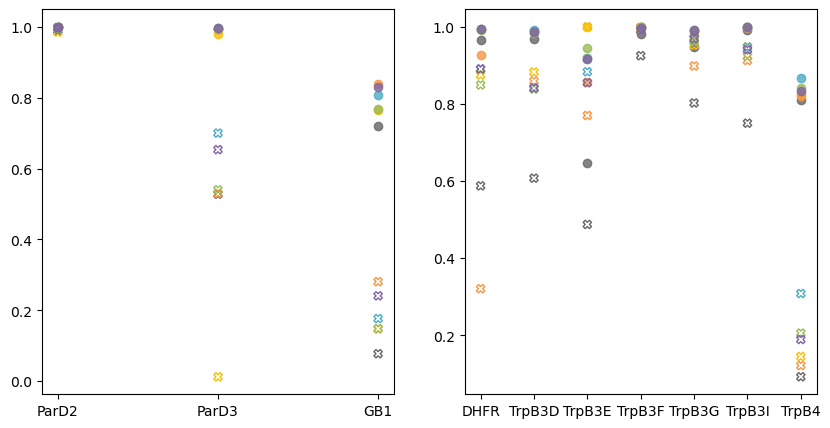

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, df_type in enumerate([binding, ea]):

    for zs in df_type["zs"].unique():

        zs_df = df_type[df_type["zs"] == zs]

        ax[i].scatter(
            x=zs_df["lib"],
            y=zs_df["top_maxes_mean"],
            color=PRESENTATION_PALETTE_SATURATE[zs_simple[zs]],
            marker="o",
            alpha=0.8,
        )
        
        ax[i].scatter(
            x=zs_df["lib"],
            y=zs_df["frac"],
            edgecolor=PRESENTATION_PALETTE_SATURATE[zs_simple[zs]],
            marker="X",
            facecolor="none",
        )


In [70]:

from SSMuLA.zs_analysis import ZS_OPTS_LEGEND
from matplotlib.lines import Line2D

%matplotlib inline

0 none #666666
1 ed_score #f9be00
2 Triad_score #f79646ff
3 ev_score #4bacc6
4 esm_score #9bbb59
5 esmif_score #8064a2


Text(0.5, 1.0125, 'ftMLDE Across 10 Landscapes')

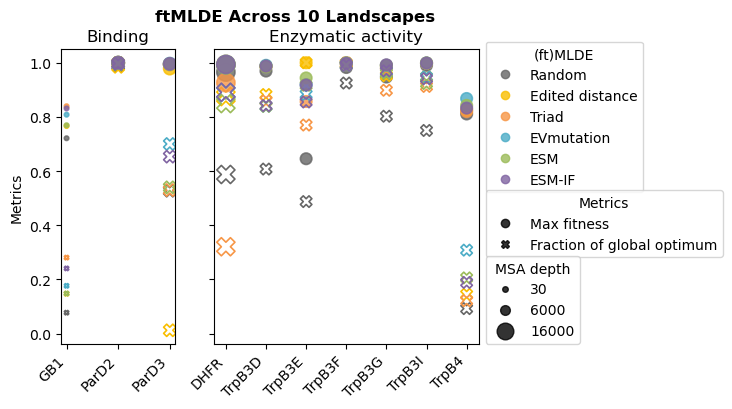

In [91]:
fig, axes = plt.subplots(
    1, 2, figsize=(6, 4), sharey=True, gridspec_kw={"width_ratios": [3, 7]}
)

zs_color_list = ["gray", "yellow", "orange", "blue", "green", "purple", "red"]

for i, zs in enumerate(["none"] + ZS_OPTS):
    zs_color = PRESENTATION_PALETTE_SATURATE[zs_color_list[i]]

    print(i, zs, zs_color)

    # zs_common_metric = "all_" + zs.split("_")[0]

    for j, lib_type in enumerate(LIB_TYPES):

        df = lib_dict_plot_df[(lib_dict_plot_df["type"] == lib_type) & (lib_dict_plot_df["zs"] == zs)].copy()

        # left binding
        axes[j].scatter(
            df["lib"],
            df["top_maxes_mean"],
            marker="o",
            alpha=0.8,
            color=zs_color,
            linewidth=1.2,
            s=df["msa"] / 100 + 10,
        )

        # left binding
        axes[j].scatter(
            df["lib"],
            df["frac"],
            marker="X",
            edgecolor=zs_color,
            facecolor="none",
            linewidth=1.2,
            s=df["msa"] / 100 + 10,
        )

for a, ax in enumerate(axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    axes[a].set_title(LIB_TYPES[a])

axes[0].set_ylabel("Metrics")

legend_list_zs = []
for i, zs in enumerate(["none"] + ZS_OPTS):
    legend_list_zs.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color=PRESENTATION_PALETTE_SATURATE[zs_color_list[i]],
            label=ZS_OPTS_LEGEND[zs],
            alpha=0.8,
        )
    )

legend_list_metric = []
for marker, label in zip(["o", "X"], ["Max fitness", "Fraction of global optimum"]):
    legend_list_metric.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=label,
        )
    )

legend_list_msa = []
# for msa_s in sorted(slice_zs["msa"].unique()):
for msa_s in [30, 6000, 16000]:
    legend_list_msa.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color="black",
            alpha=0.8,
            label=str(msa_s),
            markersize=(msa_s / 2000) + 4 ,
        )
    )


axes[1].add_artist(
    axes[1].legend(
        handles=legend_list_zs,
        loc="upper left",
        bbox_to_anchor=(1, 1.05),
        title="(ft)MLDE",
    )
)
axes[1].add_artist(
    axes[1].legend(
        handles=legend_list_metric,
        loc="upper left",
        bbox_to_anchor=(1, 0.545),
        title="Metrics",
    )
)
axes[1].legend(
    handles=legend_list_msa,
    loc="upper left",
    bbox_to_anchor=(1, 0.3215),
    title="MSA depth",
)

plt.tight_layout()
plt.suptitle("ftMLDE Across 10 Landscapes", fontsize=12, fontweight="bold", y=1.0125)
# label=zs,

In [ ]:
n_sample = 384
n_top = 96

fig, axes = plt.subplots(
    1, 2, figsize=(6, 4), sharey=True, gridspec_kw={"width_ratios": [3, 7]}
)

zs_color_list = ["yellow", "orange", "blue", "green", "purple", "red"]

for i, zs in enumerate(ZS_OPTS):
    zs_color = PRESENTATION_PALETTE_SATURATE[zs_color_list[i]]

    # zs_common_metric = "all_" + zs.split("_")[0]

    for j, lib_type in enumerate(LIB_TYPES):

        df = mlde_all[mlde_all["type"] == lib_type].copy()

        if zs in N_MUT_SUBS:
                # N_MUT_SUBS = ["double", "single"]
                df = mlde_all[
                    (mlde_all["lib"] == lib)
                    & (mlde_all["n_mut_cutoff"] == zs)
                    & (mlde_all["n_top"] == n_top)
                    & (mlde_all["encoding"] == "one-hot")
                    & (mlde_all["zs"] == "none")
                    & (mlde_all["n_samples"] == n_sample)
                ]
            else:
                # Common condition
                df = mlde_all[
                    (mlde_all["lib"] == lib)
                    & (mlde_all["n_mut_cutoff"] == n_mut)
                    & (mlde_all["n_top"] == n_top)
                    & (mlde_all["encoding"] == "one-hot")
                    & (mlde_all["zs"] == zs)
                ]

                # Apply the additional condition if needed
                if min_ftlib and zs != "none":
                    df = df[(df["ft_lib"] == df["ft_lib"].min())]
            
            std_dict = {}
            mean_dict = {}
            frac_dict = {}

            for n_samples in N_SAMPLE_LIST:
                if zs == "single" and n_samples > 100:
                    mean_dict[n_samples] = mean_dict[96]
                    std_dict[n_samples] = std_dict[96]
                    frac_dict[n_samples] = frac_dict[96]
                else:
                    # [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
                    mlde_df_n = df[df["n_sample"] == n_samples]["top_maxes"]

                    if len(mlde_df_n) == 0:
                        print(f"Empty mlde_df_n for {lib} {zs} {n_samples} {n_mut} {n_top}")

                    mean_dict[n_samples] = mlde_df_n.mean()
                    std_dict[n_samples] = mlde_df_n.std()
                    frac_dict[n_samples] = get_val_frac(mlde_df_n, numb=1)

        # left binding
        axes[j].scatter(
            df["lib"],
            df[f"{zs_common_metric}_rho"],
            marker="o",
            alpha=0.8,
            color=zs_color,
            linewidth=1.2,
            s=df["msa"] / 100 + 10,
        )

        # left binding
        axes[j].scatter(
            df["lib"],
            df[f"{zs_common_metric}_rocauc"],
            marker="X",
            edgecolor=zs_color,
            facecolor="none",
            linewidth=1.2,
            s=df["msa"] / 100 + 10,
        )

for a, ax in enumerate(axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    axes[a].set_title(LIB_TYPES[a])

axes[0].set_ylabel("Metrics")

legend_list_zs = []
for i, zs in enumerate(ZS_OPTS):
    legend_list_zs.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color=PRESENTATION_PALETTE_SATURATE[zs_color_list[i]],
            label=ZS_OPTS_LEGEND[zs],
            alpha=0.8,
        )
    )

legend_list_metric = []
for marker, label in zip(["o", "X"], [r"Spearman's $\rho$", "ROC-AUC"]):
    legend_list_metric.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=label,
        )
    )

legend_list_msa = []
# for msa_s in sorted(slice_zs["msa"].unique()):
for msa_s in [30, 6000, 16000]:
    legend_list_msa.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color="black",
            alpha=0.8,
            label=str(msa_s),
            markersize=(msa_s / 2000) + 4 ,
        )
    )


axes[1].add_artist(
    axes[1].legend(
        handles=legend_list_zs,
        loc="upper left",
        bbox_to_anchor=(1, 1.025),
        title="ZS predictors",
    )
)
axes[1].add_artist(
    axes[1].legend(
        handles=legend_list_metric,
        loc="upper left",
        bbox_to_anchor=(1, 0.57215),
        title="Metrics",
    )
)
axes[1].legend(
    handles=legend_list_msa,
    loc="upper left",
    bbox_to_anchor=(1, 0.3215),
    title="MSA depth",
)

plt.tight_layout()
plt.suptitle("ZS Across 10 Landscapes", fontsize=12, fontweight="bold", y=1.0125)